In [ ]:
import pandas as pd

# Les inn data fra CSV for Oslo
data_oslo = pd.read_csv('../data/processed/vaerdata_oslo.csv', parse_dates=['referenceTime'])

# Eksempel på datarensing: aggregering av verdier per dag og element
daily_oslo = data_oslo.groupby(['referenceTime', 'elementId']).agg({
    'value': ['mean', 'median', 'std']
})
daily_oslo.columns = ['mean', 'median', 'std']
daily_oslo = daily_oslo.reset_index()

In [12]:
# Beregne statistikk for for eksempel temperatur i Oslo
temperatur_oslo = data_oslo[data_oslo['elementId'].str.contains('air_temperature')]
mean_temp = temperatur_oslo['value'].mean()
median_temp = temperatur_oslo['value'].median()
std_temp = temperatur_oslo['value'].std()

print("Gjennomsnittstemperatur:", mean_temp)
print("Median:", median_temp)
print("Standardavvik:", std_temp)


Gjennomsnittstemperatur: 7.382108747443655
Median: 7.0
Standardavvik: 8.7294574225381


In [13]:
# Eksempel: filtrer for de relevante elementene
temp_data = data_oslo[data_oslo['elementId'].str.contains('air_temperature')].copy()
nied_data = data_oslo[data_oslo['elementId'].str.contains('precipitation_amount')].copy()

# Slå sammen datasettene på referenceTime hvis du ønsker sammenligning på daglig basis
merged_data = pd.merge(temp_data[['referenceTime', 'value']], nied_data[['referenceTime', 'value']], on='referenceTime', suffixes=('_temp', '_nedbør'))

# Beregn korrelasjonen
correlation = merged_data['value_temp'].corr(merged_data['value_nedbør'])
print("Korrelasjon mellom temperatur og nedbør:", correlation)


Korrelasjon mellom temperatur og nedbør: 0.09886897243459261


In [15]:
from sklearn.linear_model import LinearRegression

# Forbered data for regresjonsanalyse
X = merged_data[['value_temp']]
y = merged_data['value_nedbør']

reg_model = LinearRegression()
reg_model.fit(X, y)
r2_score = reg_model.score(X, y)
print("R^2 score:", r2_score)


R^2 score: 0.009775073710272197


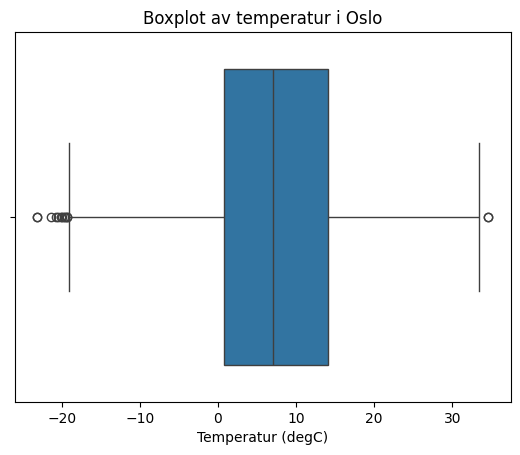

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for temperatur for å oppdage uteliggere
sns.boxplot(x=temperatur_oslo['value'])
plt.title("Boxplot av temperatur i Oslo")
plt.xlabel("Temperatur (degC)")
plt.show()


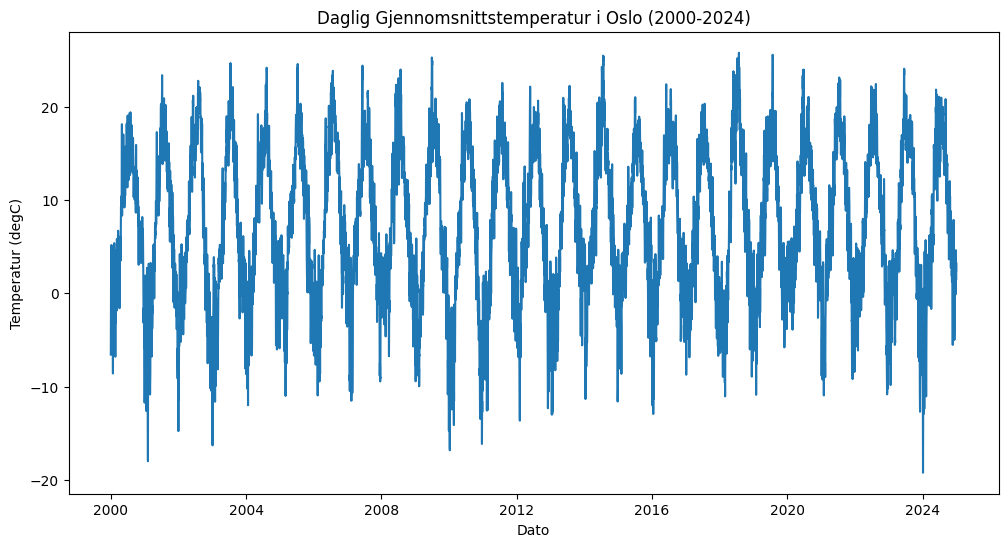

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linjeplott for daglig gjennomsnittstemperatur i Oslo
daily_temp = temp_data.groupby('referenceTime')['value'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_temp, x='referenceTime', y='value')
plt.title("Daglig Gjennomsnittstemperatur i Oslo (2000-2024)")
plt.xlabel("Dato")
plt.ylabel("Temperatur (degC)")
plt.show()


In [25]:
import plotly.express as px

fig = px.line(daily_temp, x='referenceTime', y='value', title="Interaktiv Visualisering av Temperatur i Oslo")
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

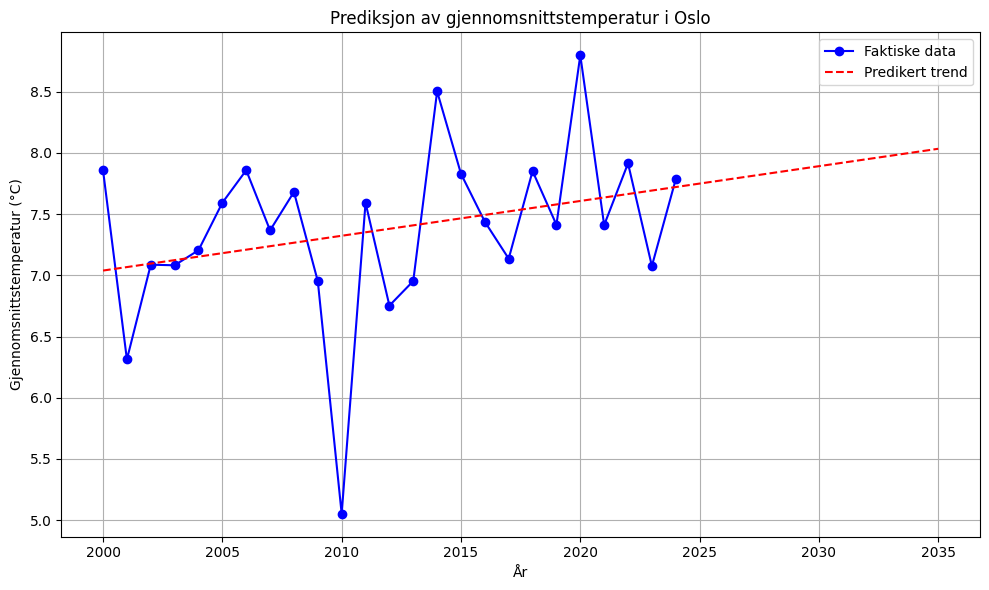

In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Eksempeldata
årstall = np.arange(2000, 2025).reshape(-1, 1)
# Beregn gjennomsnittstemperatur per år fra daily_avg_oslo
gjennomsnittstemperatur = daily_avg_oslo.groupby('year')['value'].mean().values

# Tren modell
modell = LinearRegression()
modell.fit(årstall, gjennomsnittstemperatur)

# Prediksjon frem til 2035
årstall_fremtid = np.arange(2000, 2036).reshape(-1, 1)
prediksjon = modell.predict(årstall_fremtid)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(årstall, gjennomsnittstemperatur, 'bo-', label='Faktiske data')
plt.plot(årstall_fremtid, prediksjon, 'r--', label='Predikert trend')
plt.xlabel("År")
plt.ylabel("Gjennomsnittstemperatur (°C)")
plt.title("Prediksjon av gjennomsnittstemperatur i Oslo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Eksempel: Predikere neste dags nedbør basert på dagens temperatur og vindhastighet
# Merk: Tilpass variabelene slik at de reflekterer de relevante faktorene for ekstremvær
features = data_oslo[data_oslo['elementId'].isin(['mean(air_temperature P1D)', 'mean(wind_speed P1D)'])]
target = data_oslo[data_oslo['elementId'] == 'sum(precipitation_amount P1D)']

# Forutsetter at datasettene er slått sammen på en hensiktsmessig måte, f.eks. etter 'referenceTime'
merged = pd.merge(features[['referenceTime','value']], target[['referenceTime','value']], on='referenceTime', suffixes=('_feature', '_target'))
X = merged[['value_feature']]  # Juster etter hvor mange features du har
y = merged['value_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 26.838567204957997
